In [1]:
#import the dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib import style
# plt.style.use('bnh')

In [2]:
style.use('ggplot')

In [4]:
df=pd.read_csv('downloads/TSLA.csv')
print(df.head(25))

          Date       Open       High        Low      Close  Adj Close  \
0   2010-06-29  19.000000  25.000000  17.540001  23.889999  23.889999   
1   2010-06-30  25.790001  30.420000  23.299999  23.830000  23.830000   
2   2010-07-01  25.000000  25.920000  20.270000  21.959999  21.959999   
3   2010-07-02  23.000000  23.100000  18.709999  19.200001  19.200001   
4   2010-07-06  20.000000  20.000000  15.830000  16.110001  16.110001   
5   2010-07-07  16.400000  16.629999  14.980000  15.800000  15.800000   
6   2010-07-08  16.139999  17.520000  15.570000  17.459999  17.459999   
7   2010-07-09  17.580000  17.900000  16.549999  17.400000  17.400000   
8   2010-07-12  17.950001  18.070000  17.000000  17.049999  17.049999   
9   2010-07-13  17.389999  18.639999  16.900000  18.139999  18.139999   
10  2010-07-14  17.940001  20.150000  17.760000  19.840000  19.840000   
11  2010-07-15  19.940001  21.500000  19.000000  19.889999  19.889999   
12  2010-07-16  20.700001  21.299999  20.049999  20

In [5]:
x=df[['High','Open','Low','Volume']].values
y=df['Close'].values
print(x)
print(y)

[[2.50000000e+01 1.90000000e+01 1.75400010e+01 1.87663000e+07]
 [3.04200000e+01 2.57900010e+01 2.32999990e+01 1.71871000e+07]
 [2.59200000e+01 2.50000000e+01 2.02700000e+01 8.21880000e+06]
 ...
 [6.50880005e+02 6.32419983e+02 6.18000000e+02 2.90057000e+07]
 [6.53000000e+02 6.40000000e+02 6.32520020e+02 1.57193000e+07]
 [7.86140015e+02 6.73690002e+02 6.73520020e+02 4.70650000e+07]]
[ 23.889999  23.83      21.959999 ... 640.809998 650.570007 780.      ]


In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [7]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
y_pred=regressor.predict(x_test)
result=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})
result.head(25)

,Actual,Predicted
0,207.729996,211.933274
1,28.280001,28.343446
2,24.010000,23.967470
3,315.230011,326.638890
4,200.240005,197.999511
5,210.240005,209.841431
6,26.440001,26.570540
7,22.790001,24.115965
8,224.839996,218.550465
9,353.179993,350.599448


In [12]:
import math

In [13]:
graph=result.head(20)

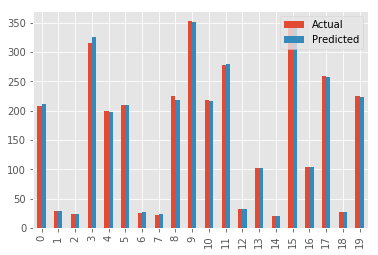

In [14]:
graph.plot(kind='bar')

In [16]:
df.shape

(2416, 7)

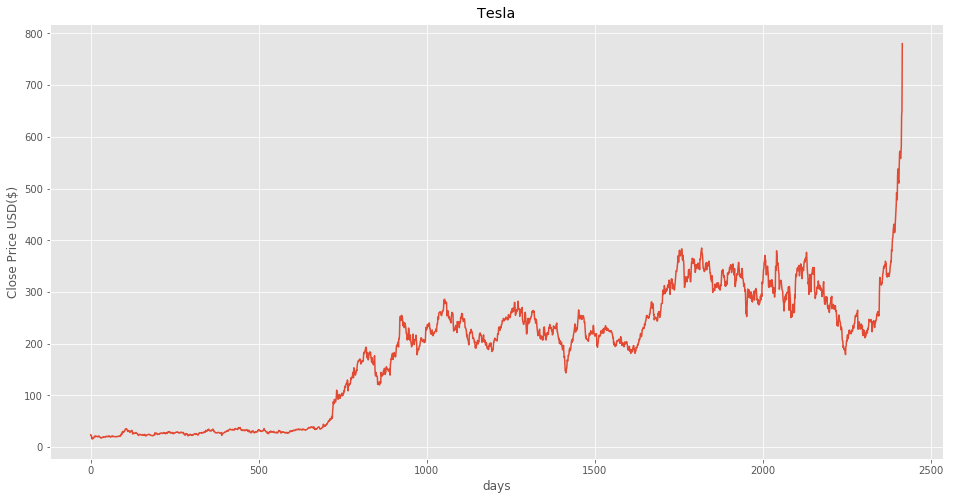

In [18]:
plt.figure(figsize=(16,8))
plt.title('Tesla')
plt.xlabel('days')
plt.ylabel('Close Price USD($)')
plt.plot(df['Close'])
plt.show()

In [20]:
df=df[['Close']]
df.head(4)

,Close
0,23.889999
1,23.830000
2,21.959999
3,19.200001


In [21]:
future_days=25
df['Prediction']=df[['Close']].shift(-future_days)
df.tail(4)

,Close,Prediction
2412,580.989990,NaN
2413,640.809998,NaN
2414,650.570007,NaN
2415,780.000000,NaN


In [23]:
x=np.array(df.drop(['Prediction'],1))[:-future_days]
print(x)

[[ 23.889999]
 [ 23.83    ]
 [ 21.959999]
 ...
 [419.220001]
 [425.25    ]
 [430.940002]]


In [24]:
y=np.array(df['Prediction'])[:-future_days]
print(y)

[ 21.26      20.450001  19.59     ... 640.809998 650.570007 780.      ]


In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [28]:
x_future=df.drop(['Prediction'],1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future

array([[352.220001],
       [354.829987],
       [333.040009],
       [336.339996],
       [328.920013],
       [331.290009],
       [329.940002],
       [334.869995],
       [336.200012],
       [333.029999],
       [330.369995],
       [335.890015],
       [339.529999],
       [348.839996],
       [352.700012],
       [359.679993],
       [358.390015],
       [381.5     ],
       [378.98999 ],
       [393.149994],
       [404.040009],
       [405.589996],
       [419.220001],
       [425.25    ],
       [430.940002]])

In [34]:
lr=LinearRegression().fit(x_train,y_train)

In [38]:
lr_prediction=lr.predict(x_future)
print(lr_prediction)

[357.26426251 359.86971527 338.11758388 341.4118392  334.00474383
 336.37062343 335.02296123 339.94439142 341.27209833 338.10759127
 335.45220738 340.96263976 344.59630154 353.89012818 357.74343979
 364.71129739 363.42355993 386.49340562 383.98775521 398.12316496
 408.99426529 410.54156015 424.14789144 430.16741705 435.84753619]


C:\Users\Atul Sonawane\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


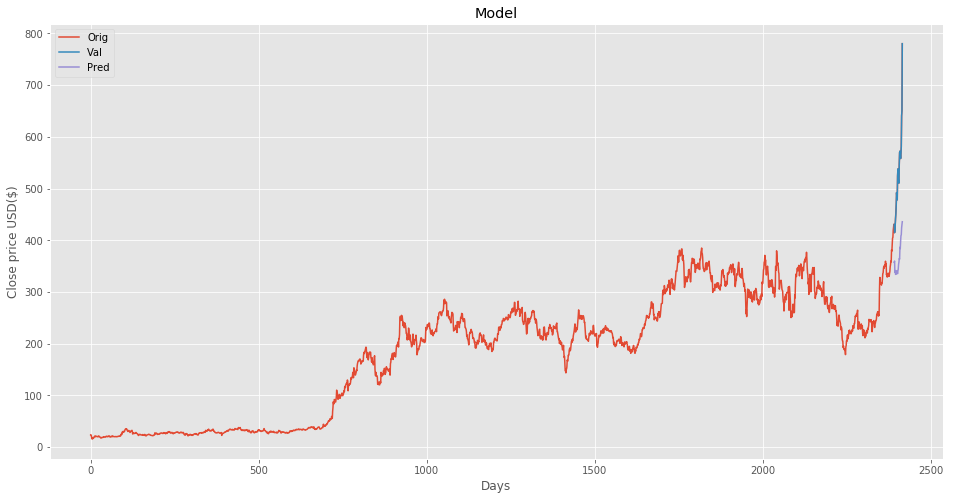

In [41]:
predictions=lr_prediction
valid=df[x.shape[0]:]
valid['Prediction']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close price USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Orig','Val','Pred'])
plt.show()